In [17]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2
import os


In [18]:
# === Step 1: Load and Clean Data ===
csv_path = "well_data_clean.csv"

In [19]:
# Load CSV
df = pd.read_csv(csv_path)


In [20]:
# Drop NaNs
df = df.dropna(subset=["H", "S", "V", "Label"])


In [21]:
# Convert Label to integer if not already
df["Label"] = df["Label"].astype(int)

In [22]:
# === Step 2: Prepare Features and Labels ===
X = df[["H", "S", "V"]].values
y = df["Label"].values

In [23]:
# Final sanity check
print("✅ Label Distribution:\n", pd.Series(y).value_counts())
print("✅ Shape of X:", X.shape)
print("✅ Shape of y:", y.shape)

✅ Label Distribution:
  1    36
-1    21
Name: count, dtype: int64
✅ Shape of X: (57, 3)
✅ Shape of y: (57,)


In [24]:
# === Step 3: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
# === Step 4: Train SVM with RBF ===
clf = SVC(kernel="rbf", gamma="scale", class_weight="balanced")
clf.fit(X_train, y_train)



SVC(class_weight='balanced')

In [26]:
# === Step 5: Evaluation ===
y_pred = clf.predict(X_test)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))



📊 Classification Report:

              precision    recall  f1-score   support

          -1       0.40      0.50      0.44         4
           1       0.71      0.62      0.67         8

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.61      0.58      0.59        12



In [27]:
# === Step 6: Optional Prediction on Unknown Sample ===

def extract_average_hsv(image_path, grid_shape=(4, 5)):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at: {image_path}")
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, w, _ = hsv.shape
    cell_h, cell_w = h // grid_shape[0], w // grid_shape[1]
    features = []
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            cell = hsv[i*cell_h:(i+1)*cell_h, j*cell_w:(j+1)*cell_w]
            avg_hsv = np.mean(cell.reshape(-1, 3), axis=0)
            features.append(avg_hsv)
    return np.array(features)


In [29]:
unknown_path = "sample 1.png"

if os.path.exists(unknown_path):
    try:
        unknown_X = extract_average_hsv(unknown_path)
        predictions = clf.predict(unknown_X)
        print("\n🔍 Predictions for Unknown Sample:")
        for i, pred in enumerate(predictions, 1):
            print(f"Well {i}: {'Positive' if pred == 1 else 'Negative'}")
    except Exception as e:
        print("⚠️ Error while predicting unknown sample:", e)
else:
    print(f"⚠️ No unknown sample found at '{unknown_path}'.")


🔍 Predictions for Unknown Sample:
Well 1: Positive
Well 2: Positive
Well 3: Positive
Well 4: Positive
Well 5: Positive
Well 6: Positive
Well 7: Positive
Well 8: Positive
Well 9: Positive
Well 10: Positive
Well 11: Positive
Well 12: Positive
Well 13: Negative
Well 14: Negative
Well 15: Negative
Well 16: Positive
Well 17: Positive
Well 18: Negative
Well 19: Negative
Well 20: Negative


In [34]:
unknown_path = "sample 2.png"

if os.path.exists(unknown_path):
    try:
        unknown_X = extract_average_hsv(unknown_path)
        predictions = clf.predict(unknown_X)
        print("\n🔍 Predictions for Unknown Sample:")
        for i, pred in enumerate(predictions, 1):
            print(f"Well {i}: {'Positive' if pred == 1 else 'Negative'}")
    except Exception as e:
        print("⚠️ Error while predicting unknown sample:", e)
else:
    print(f"⚠️ No unknown sample found at '{unknown_path}'.")


🔍 Predictions for Unknown Sample:
Well 1: Positive
Well 2: Positive
Well 3: Positive
Well 4: Positive
Well 5: Positive
Well 6: Positive
Well 7: Positive
Well 8: Positive
Well 9: Positive
Well 10: Negative
Well 11: Positive
Well 12: Positive
Well 13: Negative
Well 14: Negative
Well 15: Negative
Well 16: Positive
Well 17: Positive
Well 18: Positive
Well 19: Negative
Well 20: Positive


In [35]:
unknown_path = "sample 3.png"

if os.path.exists(unknown_path):
    try:
        unknown_X = extract_average_hsv(unknown_path)
        predictions = clf.predict(unknown_X)
        print("\n🔍 Predictions for Unknown Sample:")
        for i, pred in enumerate(predictions, 1):
            print(f"Well {i}: {'Positive' if pred == 1 else 'Negative'}")
    except Exception as e:
        print("⚠️ Error while predicting unknown sample:", e)
else:
    print(f"⚠️ No unknown sample found at '{unknown_path}'.")


🔍 Predictions for Unknown Sample:
Well 1: Positive
Well 2: Positive
Well 3: Positive
Well 4: Positive
Well 5: Positive
Well 6: Negative
Well 7: Negative
Well 8: Positive
Well 9: Positive
Well 10: Positive
Well 11: Negative
Well 12: Negative
Well 13: Negative
Well 14: Positive
Well 15: Positive
Well 16: Positive
Well 17: Negative
Well 18: Positive
Well 19: Positive
Well 20: Positive


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

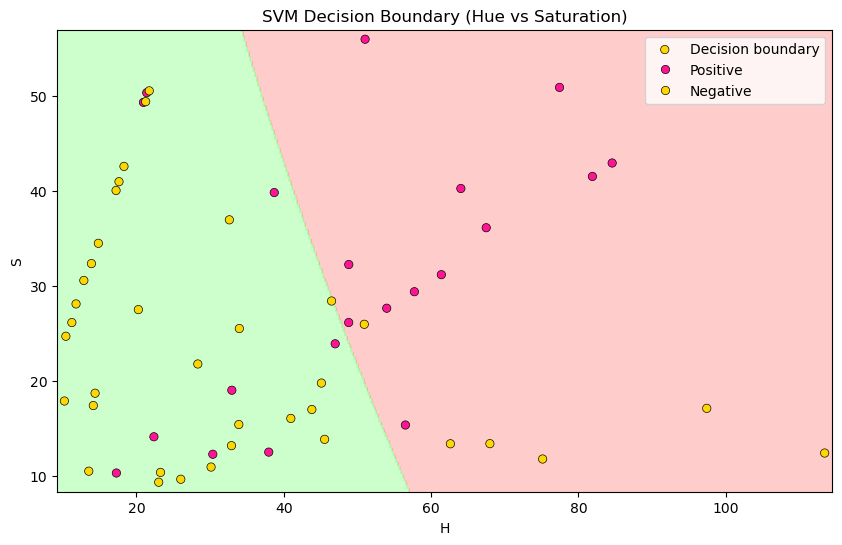

In [37]:
def plot_decision_boundary(X, y, model, xlabel="H", ylabel="S"):
    # Use only H and S for 2D visualization
    X_vis = X[:, :2]
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.full_like(xx.ravel(), np.mean(X[:, 2]))])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Plot original data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={1: "gold", -1: "deeppink"}, edgecolor="k")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("SVM Decision Boundary (Hue vs Saturation)")
    plt.legend(["Decision boundary", "Positive", "Negative"])
    plt.show()

plot_decision_boundary(X, y, clf)

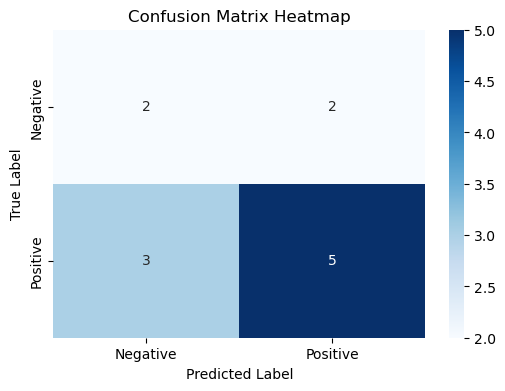

In [38]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


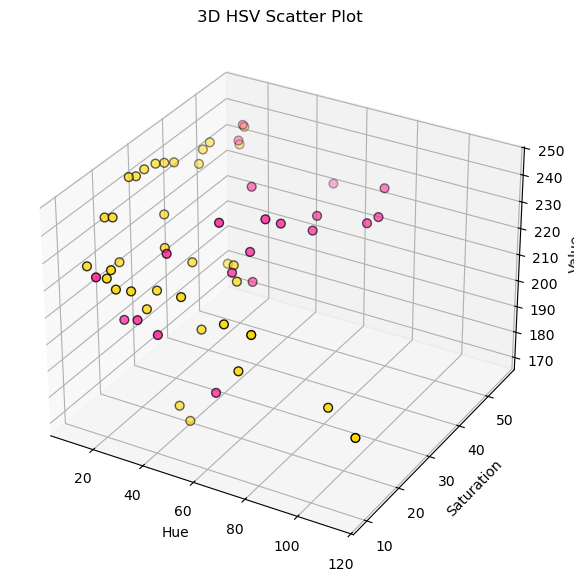

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['deeppink' if label == -1 else 'gold' for label in y]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, s=40, edgecolor='k')

ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
ax.set_title('3D HSV Scatter Plot')
plt.show()
